- **Importation**

In [38]:
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt 
import nltk

In [39]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Imad Eddine
[nltk_data]     Hajjane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
CONTENT_PATH_CSV = os.path.join("content", "word_freq.csv")
RESULT_PATH_CSV = os.path.join("..", "result", "word_freq.csv")
CONTENT_LEGTH_FREQUENCY = os.path.join("content", "frequency_by_word_length.png")

In [41]:
dataframe = pd.read_csv(os.path.join("content", "clean_tweet.csv"), encoding="latin-1")

- **TF-IDF**

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df = 0.5, use_idf = True,  dtype=np.float32)
vectors = vectorizer.fit_transform(dataframe["text"] )

- **Constitution du vocabulaire du corpus et leur fréquence**

In [43]:
vocabulaire = vectorizer.get_feature_names_out()
len(vocabulaire)

40195

In [44]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = len(vocabulaire), oov_token='')
tokenizer.fit_on_texts(dataframe["text"])
word_index = tokenizer.word_index

In [45]:
%%time
word_index = {k: v for k, v in word_index.items() if k in vocabulaire}

CPU times: total: 12.3 s
Wall time: 12.4 s


In [46]:
voc = pd.DataFrame({"vocabulary":word_index.keys(), "frequency":word_index.values()}).sort_values('frequency', ascending=False)

In [47]:
voc.columns

Index(['vocabulary', 'frequency'], dtype='object')

In [48]:
voc.to_csv(RESULT_PATH_CSV, encoding="latin-1", index=False)
voc.to_csv(CONTENT_PATH_CSV, encoding="latin-1", index=False)

- **La fréquence des mots du corpus**

Text(0.5, 1.0, 'The 20 most frequent words in the corpus.')

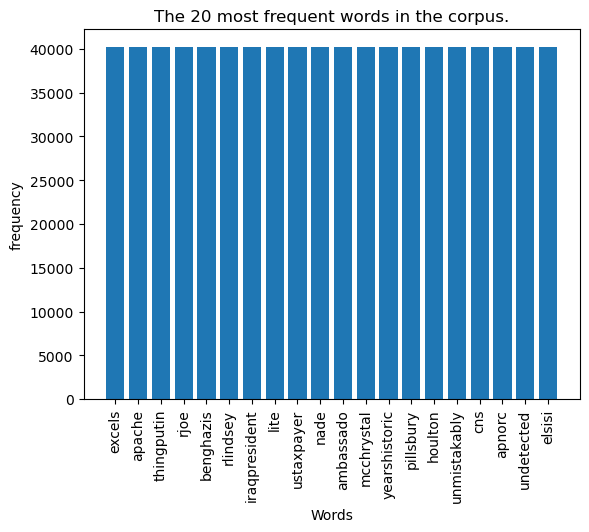

In [49]:
"""fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Bar(
            x=voc["frequency"].iloc[:20],
            y=voc["vocabulary"].iloc[:20],
            orientation='h', type="bar",
    name="frequency", marker=dict(color="red")), 1, 1)"""
plt.bar(voc["vocabulary"].iloc[:20], voc["frequency"].iloc[:20])
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('frequency')
plt.title('The 20 most frequent words in the corpus.')

- **longueur des mots du corpus et leur fréquence** 

In [50]:
voc["length"] = voc["vocabulary"].apply(lambda x : len(x))

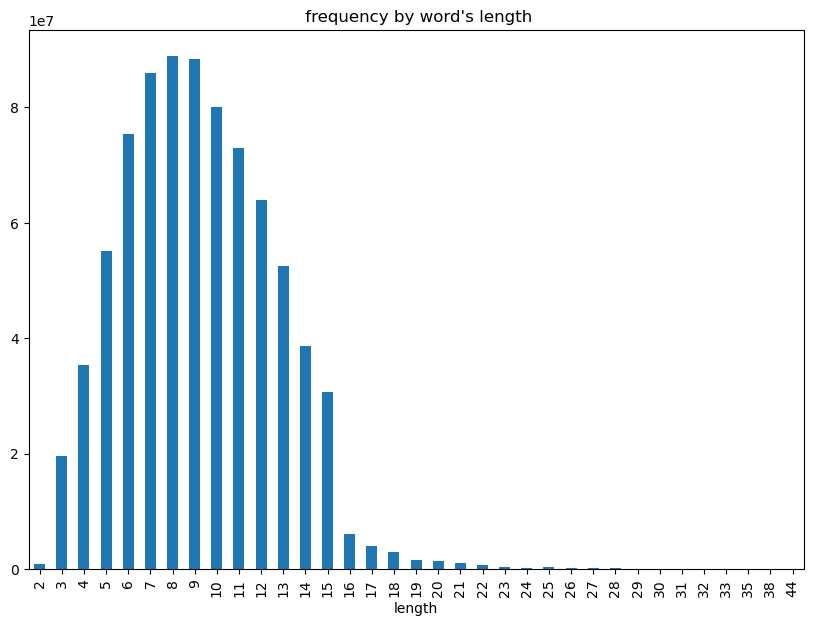

In [51]:
plt.figure(figsize=(10,7))
voc.groupby('length')['frequency'].sum().plot(kind='bar')
plt.title(" frequency by word's length")
plt.savefig(CONTENT_LEGTH_FREQUENCY)
plt.show()

- **la dispersion des 20 mots les plus fréquents dans un corpus**

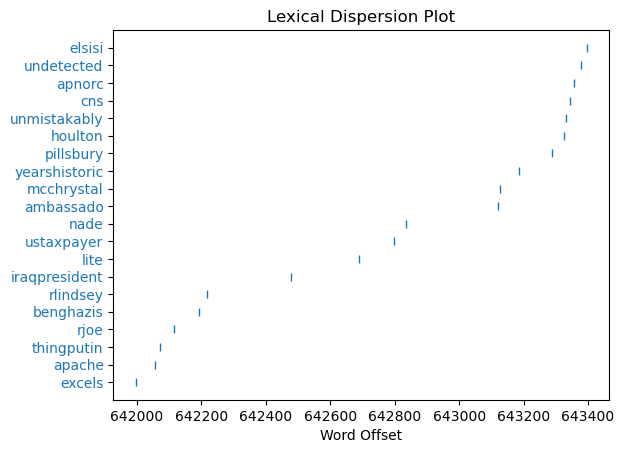

In [52]:
text = nltk.Text(nltk.word_tokenize(" ".join(dataframe["text"].tolist())))
text.dispersion_plot(voc["vocabulary"].iloc[:20].tolist())
plt.savefig(os.path.join("content", "Lexical_Dispersion.png"))
plt.show()